# **COMP2211 Exploring Artificial Inteligence** 

## Lab7 : Digital Image Processing Fundamentals

<br>

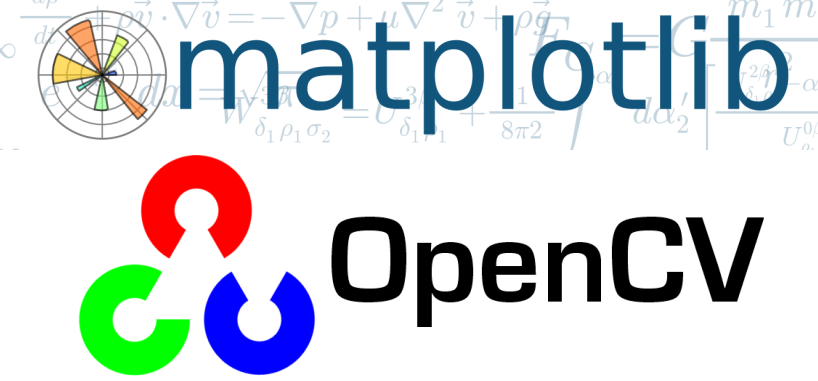

# Review #
Before we start, let's recap the lecture briefly and go through the basics of **Matplotlib** and **OpenCV**.

### **Download Images**
Run the following cell of code to download an image of Pikachu for later use.

In [1]:
url = 'https://www.denofgeek.com/wp-content/uploads/2021/04/Pikachu.png?fit=1920%2C1080'
!wget $url -O pikachu.png
!ls

--2023-04-26 10:28:34--  https://www.denofgeek.com/wp-content/uploads/2021/04/Pikachu.png?fit=1920%2C1080
Resolving www.denofgeek.com (www.denofgeek.com)... 192.0.66.88, 2a04:fa87:fffd::c000:4258
Connecting to www.denofgeek.com (www.denofgeek.com)|192.0.66.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213765 (1.2M) [image/png]
Saving to: ‘pikachu.png’

pikachu.png         100%[===================>]   1.16M  7.34MB/s    in 0.2s    

2023-04-26 10:28:34 (7.34 MB/s) - ‘pikachu.png’ saved [1213765/1213765]

pikachu.png  sample_data


### **Matplotlib Basics** 
Matplotlib is a popular graph-plotting library in Python. Before we practice various image processing techniques with Matplotlib and OpenCV, let's first take a look at the following basic functions of Matplotlib:
- **plt.plot** for plotting lines
- **plt.scatter** for plotting dots
- **plt.hist** for plotting histograms
- **plt.subplots** for plotting multiple subfigures
- **plt.imread**, **plt.imshow**, and **plt.imsave** for reading, displaying, and saving images 

In [2]:
import os, sys             
import numpy as np    # Import NumPy package
import matplotlib.pyplot as plt   # Import pyplot package
import cv2   # import opencv package

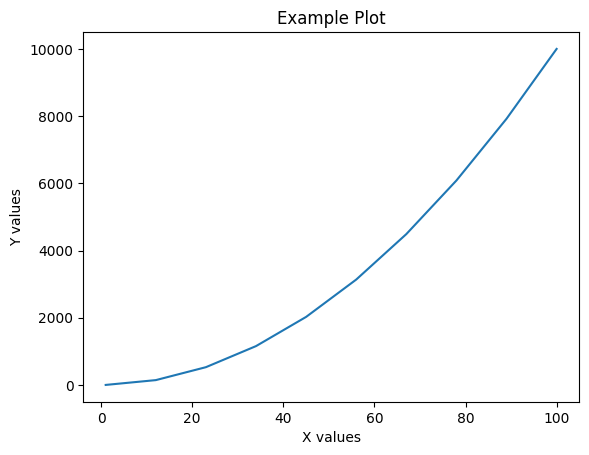

<Figure size 640x480 with 0 Axes>

In [6]:
# Use plt.plot to plot lines
x = np.linspace(1, 100, 10) # Sample 40 equidistant points between 1 to 100  
y = x ** 2  # y = x * x

plt.plot(x,y) # Plot y vs x
plt.title('Example Plot')  # Set a title for the plot
plt.xlabel('X values')   # Set a label for the x-axis
plt.ylabel('Y values')  # Set a label for the y-axis
plt.show() # Display the figure
plt.clf()  # Clear the current figure

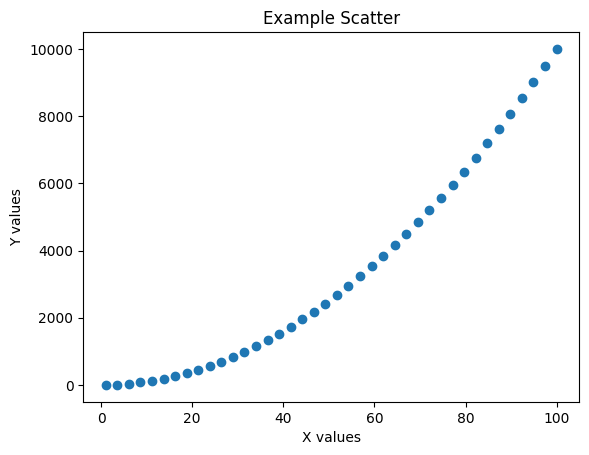

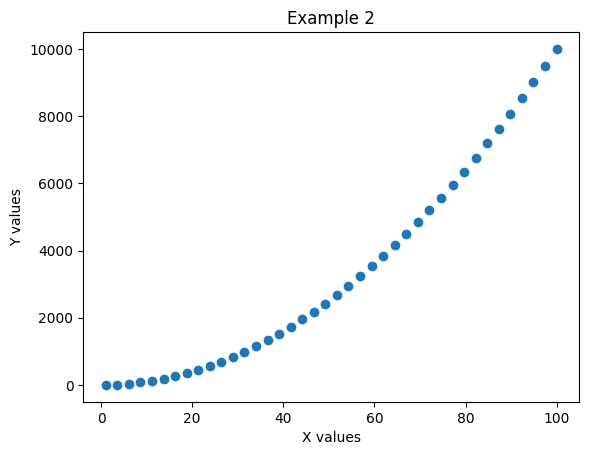

In [4]:
# Use plt.scatter to plot dots
x = np.linspace(1, 100, 40)   # Sample 40 equidistant points between 1 to 100  
y = x ** 2    # y = x * x

plt.scatter(x,y)      # A scatter plot of y vs x
plt.title('Example Scatter')  # Set a title for the plt
plt.xlabel('X values')     # Set a label for the x-axis
plt.ylabel('Y values')     # Set a label for the y-axis
plt.show()   # Display the figure
plt.clf()   # Clear the current figure

z = x ** 3
plt.scatter(x, y)
plt.title("Example 2")
plt.xlabel('X values')     # Set a label for the x-axis
plt.ylabel('Y values')     # Set a label for the y-axis
plt.show()

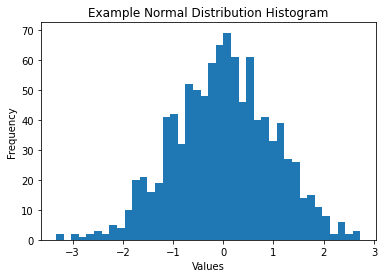

<Figure size 432x288 with 0 Axes>

In [ ]:
# Use plt.hist to plot histograms
data = [ np.random.standard_normal() for _ in range(1000)] # Sample random numbers from standard normal distribution with mean=0, standard deviation 1
plt.hist(data, bins=40)    # Plot a histogram with 40 bins
plt.title('Example Normal Distribution Histogram')  # Set a title for the plot
plt.xlabel('Values')     # Set a label for the x-axis
plt.ylabel('Frequency')   # Set a label for the y-axis
plt.show()        # Display the figure
plt.clf()        # Clear the current figure

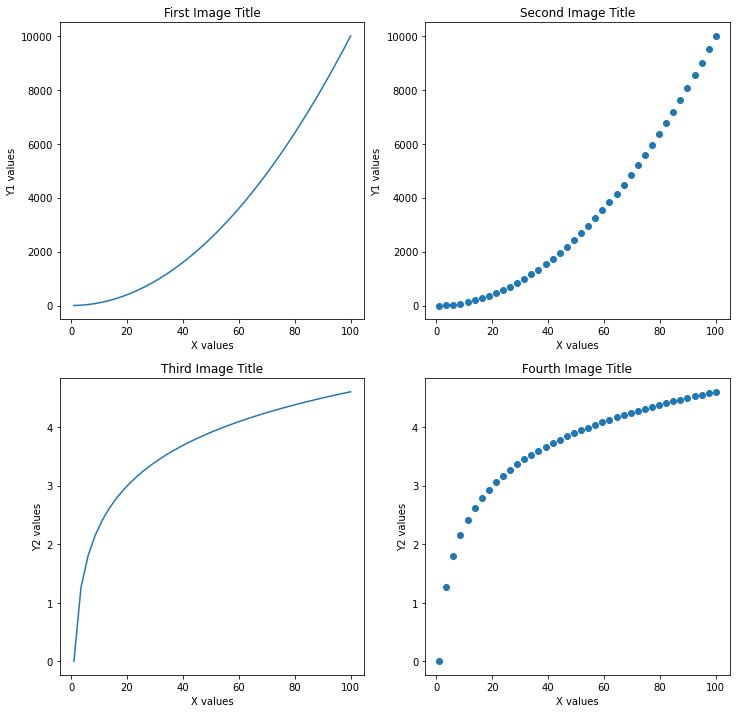

In [ ]:
# Use plt.subplots to plot multiple subfigures
x = np.linspace(1, 100, 40)       # Sample 40 equidistant points between 1 to 100  
y1 = x**2                         # y = x * x
y2 = np.log(x)                    # y = log(x)

plt.figure(figsize=(12,12))       # optional, here we set the size of figure to be 12 x 12
plt.subplot(2, 2, 1)              # We are accessing the first subfigure, where there are 2 rows and 2 columns of subfigures in total
plt.plot(x, y1)                   # Plot of y1 vs x
plt.title('First Image Title')    # Set a title for axes
plt.xlabel('X values')            # Set a label for the x-axis
plt.ylabel('Y1 values')           # Set a label for the y-axis

plt.subplot(2, 2, 2)              # We are accessing the seond subfigure, where there are 2 rows and 2 columns of subfigures in total
plt.scatter(x, y1)                # A scatter plot of y1 vs x
plt.title('Second Image Title')   # Set a title for axes
plt.xlabel('X values')            # Set a label for the x-axis
plt.ylabel('Y1 values')           # Set a label for the y-axis

plt.subplot(2, 2, 3)              # We are accessing the third subfigure, where there are 2 rows and 2 columns of subfigures in total
plt.plot(x, y2)                   # Plot of y2 vs x
plt.title('Third Image Title')    # Set a title for axes
plt.xlabel('X values')            # Set a label for the x-axis
plt.ylabel('Y2 values')           # Set a label for the y-axis

plt.subplot(2, 2, 4)              # We are accessing the fourth subfigure, where there are 2 rows and 2 columns of subfigures in total
plt.scatter(x, y2)                # A scatter plot of y2 vs x
plt.title('Fourth Image Title')   # Set a title for axes
plt.xlabel('X values')            # Set a label for the x-axis
plt.ylabel('Y2 values')           # Set a label for the y-axis

plt.show()                        # Display the figure 

<class 'numpy.ndarray'>
Dimensions: 1080x1920x3
Total number of pixels: 2073600


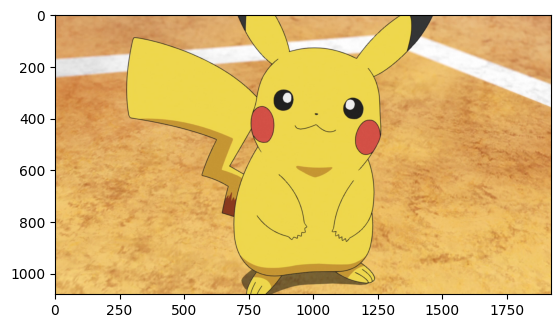

In [5]:
# Use plt.imread, plt.imshow, and plt.imsave to read, display, and save images
img = plt.imread('pikachu.png')           # Read the image pikachu.png and we get an image that stores as NumPy array 
print(type(img))                          # Show the data type of img
plt.imshow(img)                           # Display the image

[height, width, channels] = np.shape(img) # Find the shape of image

# Print the information of the image
print('Dimensions: {}x{}x{}'.format(height, width, channels))
print('Total number of pixels:', width*height)

plt.imsave('pikachu2.png', img)          # Save the image with name 'pikachu2.png'


### **Image Processing** 
Then we will go through the following image processing techniques with examples:

* **Image cropping**
* **Color to grayscale**
* **Image translation**
* **Image resizing**
* **Image reflection**
* **Image padding**
* **Image thresholding**
* **Image convolution**
* **Non-linear filtering**



### **Image cropping**

[[[0.81568629 0.         0.        ]
  [0.81568629 0.         0.        ]
  [0.81568629 0.         0.        ]
  ...
  [0.82352942 0.         0.        ]
  [0.82745099 0.         0.        ]
  [0.82745099 0.         0.        ]]

 [[0.81960785 0.         0.        ]
  [0.81960785 0.         0.        ]
  [0.81960785 0.         0.        ]
  ...
  [0.82745099 0.         0.        ]
  [0.83137256 0.         0.        ]
  [0.83137256 0.         0.        ]]

 [[0.82352942 0.         0.        ]
  [0.82352942 0.         0.        ]
  [0.82352942 0.         0.        ]
  ...
  [0.83137256 0.         0.        ]
  [0.83529413 0.         0.        ]
  [0.83529413 0.         0.        ]]

 ...

 [[0.86666667 0.         0.        ]
  [0.87058824 0.         0.        ]
  [0.87450981 0.         0.        ]
  ...
  [0.93333334 0.         0.        ]
  [0.93333334 0.         0.        ]
  [0.93333334 0.         0.        ]]

 [[0.85882354 0.         0.        ]
  [0.86274511 0.         0.        ]


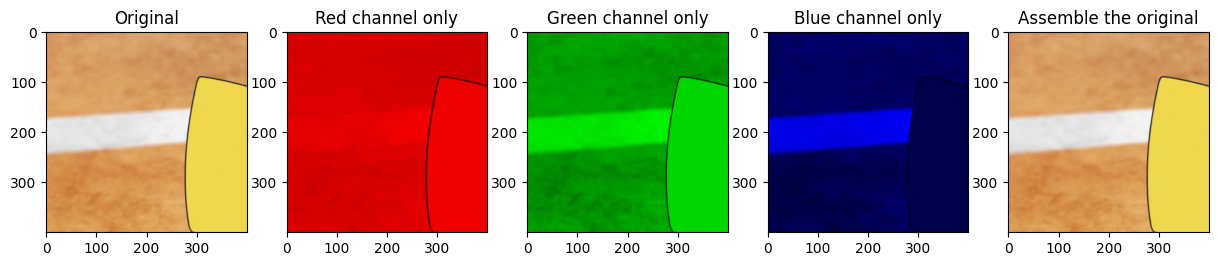

In [7]:
# Image cropping

img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array
img = img[:400, :400, :]         # Get the top-left 400x400 patch of the image

transform1 = np.array([1,0,0]).reshape(1,1,3) #  (= [[[1,0,0]]])
transform2 = np.array([0,1,0]).reshape(1,1,3) #  (= [[[0,1,0]]])
transform3 = np.array([0,0,1]).reshape(1,1,3) #  (= [[[0,0,1]]])

img2 = img * transform1 # Collect only first channel 
print(img2)
img3 = img * transform2 # Collect only second channel
img4 = img * transform3 # Collect only last channel
img5 = img * (transform1 + transform2 + transform3) # [[[1,1,1]]] corresponds to collecting all channels

plt.figure(figsize=(15,15))   # Optional, here we set the size of figure to be 15 x 15
plt.subplot(1, 5, 1)          # We are accessing the first subfigure, where there are 1 row and 5 columns of subfigures in total
plt.imshow(img)               # Show the first subfigure
plt.title('Original')
plt.subplot(1, 5, 2)          # We are accessing the second subfigure, where there are 1 row and 5 columns of subfigures in total
plt.imshow(img2)              # Show the second subfigure
plt.title('Red channel only')
plt.subplot(1, 5, 3)          # We are accessing the third subfigure, where there are 1 row and 5 columns of subfigures in total
plt.imshow(img3)              # Show the third subfigure
plt.title('Green channel only')
plt.subplot(1, 5, 4)          # We are accessing the fourth subfigure, where there are 1 row and 5 columns of subfigures in total
plt.imshow(img4)              # Show the fourth subfigure
plt.title('Blue channel only')
plt.subplot(1, 5, 5)          # We are accessing the fifth subfigure, where there are 1 row and 5 columns of subfigures in total
plt.imshow(img5)              # Show the fifth subfigure
plt.title('Assemble the original')
plt.show()                    # Display the figure 

### **Color to grayscale** 

The formula for the conversion is as follows:

$V = 0.299 \times R + 0.587 \times G + 0.114 \times B$,

where $V$ is the intensity of the grayscale image, $R$, $G$, and $B$ are the intensities of red, green, and blue channels, respectively.

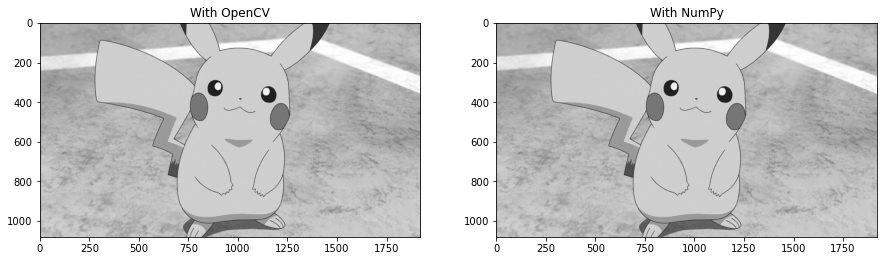

In [ ]:
# color to grayscale
img = plt.imread('pikachu.png')   # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 30)
plt.figure(figsize=(15,30))

#### Method 1: Convert the color image to gray using opencv
plt.subplot(1, 2, 1)
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   # Convert color image to grayscale
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)  # Show the image in grayscale
plt.title('With OpenCV')

#### Method 2 : Equivalent NumPy Implementation
plt.subplot(1, 2, 2)
gray_img = img * np.array([0.299, 0.587, 0.114]).reshape(1,1,3) # do the transformation manually
gray_img = np.sum(gray_img, axis=-1)
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=1)
plt.title('With NumPy')

plt.show()

### **Image resizing** 

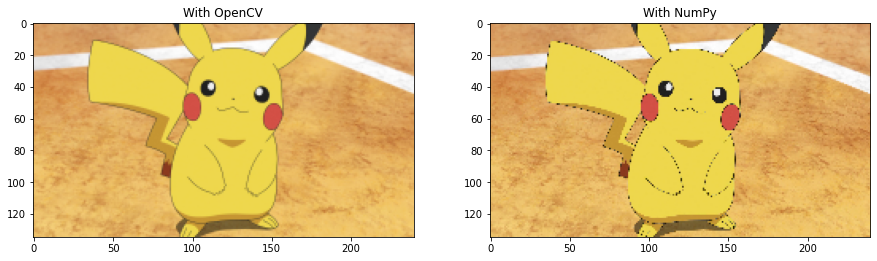

In [ ]:
# Image resizing
img = plt.imread('pikachu.png')   # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 30)
plt.figure(figsize=(15,30))

#### Method 1 : Use opencv to resize the image to 1/8 of the original size 
# Note that the ordering of the size is "width, height"
plt.subplot(1, 2, 1)
img_h, img_w, _ = img.shape
img_h_new = img_h // 8   
img_w_new = img_w // 8
resizedImg = cv2.resize(img,(img_w_new,img_h_new),interpolation=cv2.INTER_AREA) # Perform the transformation; there are several options for interpolation
plt.imshow(resizedImg)  # Show the resized image
plt.title('With OpenCV')

#### Method 2 : Do the downsampling manually
plt.subplot(1, 2, 2)
plt.imshow(img[::8,::8,:])  # Skip every 8 rows and every 8 columns
plt.title('With NumPy')

plt.show()  # Show the figure



### **Affine transformation**

A set of operations can be implemented with cv2.warpAffine(), including translation, rotation, reflection and scaling. These operations can also be easily combined by manipulating the corresponding affine matrices.

### **Image reflection**  

Vertical refection

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & (rows-1)\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$

Horizontal reflection

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
-1 & 0 & (cols-1) \\
0 & 1 & 0\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$

Diagonal reflection

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
-1 & 0 & (cols-1) \\
0 & -1 & (rows-1)\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$


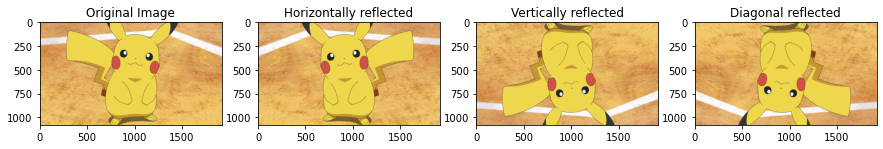

In [ ]:
# image reflection
img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 10)
plt.figure(figsize=(15,10))  

plt.subplot(1, 4, 1)
plt.imshow(img)                           # Show the original image 
plt.title('Original Image')

plt.subplot(1, 4, 2)
rows, cols, _ = img.shape                             # Find the shape of the gray image
M = np.float32([[-1,0,cols-1], [0, 1, 0]])              # Form the transformation matrix of y-axis reflection
yaxisreflection = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(yaxisreflection)                           # Show the image 
plt.title('Horizontally reflected')

plt.subplot(1, 4, 3)
M = np.float32([[1,0,0], [0, -1, rows-1]])              # Form the transformation matrix of x-axis reflection
xaxisreflection = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(xaxisreflection)                           # Show the image 
plt.title('Vertically reflected')

plt.subplot(1, 4, 4)
M = np.float32([[-1,0,cols-1], [0, -1, rows-1]])  # Form the transformation matrix of diagonal reflection
xyaxisreflection = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(xyaxisreflection)  
plt.title('Diagonal reflected')

                                  
plt.show()                                            # Show all the subfigures

### **Image translation**  

Shift the image for $t_x$ and $t_y$ along x,y axis

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$

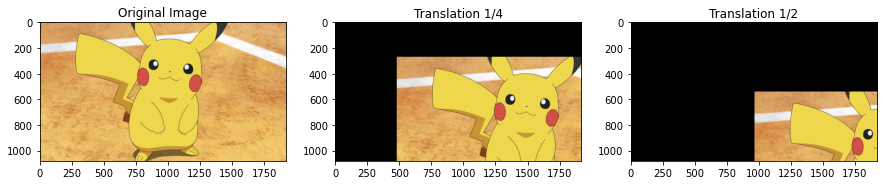

In [ ]:
# image translation
img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 10)
plt.figure(figsize=(15,10))  
rows, cols, _ = img.shape                 # Find the shape of the gray image

plt.subplot(1, 3, 1)
plt.imshow(img)                           # Show the original image 
plt.title('Original Image')

#shift the image by certain propotion of its size
plt.subplot(1, 3, 2)
M = np.float32([[1,0,cols/4], [0, 1, rows/4]])   # Form the transformation matrix 
transimg4 = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(transimg4)                           # Show the image 
plt.title('Translation 1/4')

plt.subplot(1, 3, 3)
M = np.float32([[1,0,cols/2], [0, 1, rows/2]])  # Form the transformation matrix 
transimg2 = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(transimg2)                           # Show the image 
plt.title('Translation 1/2')


plt.show()                                            # Show all the subfigures

### **Image scaling**  

scaling the image in x,y dimenstion by scale factors $s_x,s_y$

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
s_x & 0 & 0\\
0 & s_y & 0\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$

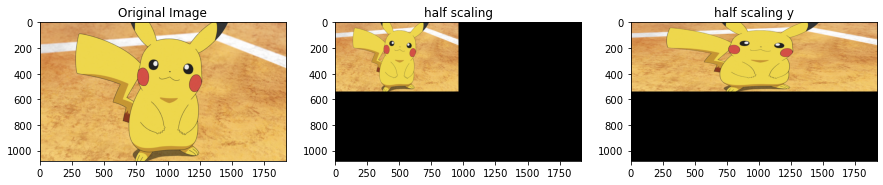

In [ ]:
# image scaling
img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 10)
plt.figure(figsize=(15,10))  
rows, cols, _ = img.shape                 # Find the shape of the gray image

plt.subplot(1, 3, 1)
plt.imshow(img)                           # Show the original image 
plt.title('Original Image')

#half scaling
plt.subplot(1, 3, 2)
M = np.float32([[1/2,0,0], [0, 1/2, 0]])   # Form the transformation matrix 
scale_tl = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(scale_tl)                           # Show the image 
plt.title('half scaling')

#half scaling only in y
plt.subplot(1, 3, 3)
M = np.float32([[1,0,0], [0, 1/2, 0]])   # Form the transformation matrix 
scale_center = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(scale_center)                           # Show the image 
plt.title('half scaling y')


plt.show()                                            # Show all the subfigures

### **Image rotation**  

Rotate image by angle $\theta$, along center $(x_0, y_0)$

$
\begin{bmatrix}
x'   \\
y' \\ 
\end{bmatrix}=\begin{bmatrix}
cos\theta & sin\theta & -x_0cos\theta-y_0sin\theta+x_0\\
-sin\theta & cos\theta & x_0sin\theta-y_0cos\theta+y_0\\ 
\end{bmatrix}
\begin{bmatrix}
x   \\
y \\ 
1\\
\end{bmatrix}
$

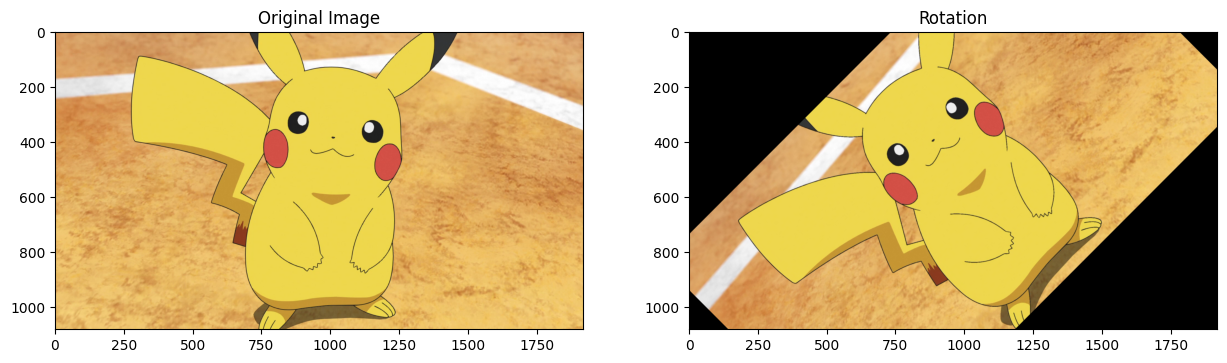

In [ ]:
# image rotation
img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (15, 10)
plt.figure(figsize=(15,10))  
rows, cols, _ = img.shape                 # Find the shape of the gray image

plt.subplot(1, 2, 1)
plt.imshow(img)                           # Show the original image 
plt.title('Original Image')

#rotate 45 degrees, centered at center point
plt.subplot(1, 2, 2)
theta_radian=45/180*np.pi
x0,y0=cols/2,rows/2
sin_theta,cos_theta=np.sin(theta_radian),np.cos(theta_radian)
M = np.float32([[cos_theta,sin_theta,-x0*cos_theta-y0*sin_theta+x0], [-sin_theta, cos_theta, x0*sin_theta-y0*cos_theta+y0]])   # Form the transformation matrix 
scale_tl = cv2.warpAffine(img, M, (cols,rows)) # Perform the transformation
plt.imshow(scale_tl)   # Show the image 
plt.title('Rotation')

plt.show()                                           


### **Image padding** 

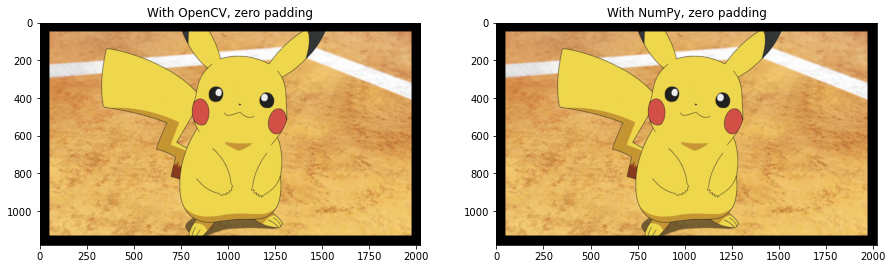

In [ ]:
# image padding
img = plt.imread('pikachu.png')  # Read the image pikachu.png and we get an image that stores as NumPy array

# Define a figure with size (20, 20)
plt.figure(figsize=(15,10))

#### Method 1 : Use opencv for zero padding 
plt.subplot(1, 2, 1)
padImgConst = cv2.copyMakeBorder(img, 
              50, 50, 50, 50,                   # The padded number of pixels is 50 at top, bottom, left, and right, respectively
              cv2.BORDER_CONSTANT, 0)           # Set the type of padding to be constant, and the padded value is zero
plt.imshow(padImgConst)
plt.title('With OpenCV, zero padding')


#### Method 2: Do the padding manually

plt.subplot(1, 2, 2)
pad = 50
# Zero pad 
zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2, img.shape[2]])   # Create an empty array with (2 *pad, 2 *pad) larger than original image
zero_padded_img[pad:-pad, pad:-pad, :] = img                                                 # Copy image values to the middle of the empty image
plt.imshow(zero_padded_img)                                                                  # Show image
plt.title('With NumPy, zero padding')

plt.show()

### **Image thresholding** 

* With fixed threshold



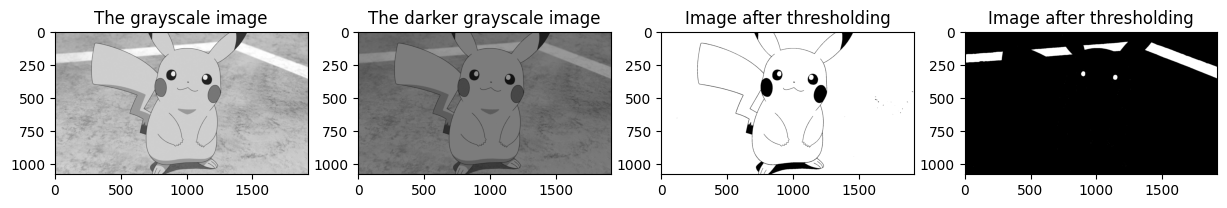

In [ ]:
# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array

plt.figure(figsize=(15,10))

# Convert the color image to gray and show it
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
darkgrayImg= grayImg*0.6 #simulate dark image

plt.subplot(1,4,1)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('The grayscale image')

plt.subplot(1,4,2)
plt.imshow(darkgrayImg, cmap='gray', vmin=0, vmax=1)
plt.title('The darker grayscale image')

# Convert pixel values from [0,1] to [0,255]
grayImgUint = grayImg*255
grayImgUint = grayImgUint.astype(np.uint8) # Images usually require unsigned int8 as data type
darkgrayImgUint = darkgrayImg*255
darkgrayImgUint = darkgrayImgUint.astype(np.uint8) # Images usually require unsigned int8 as data type

# Perform thresholding with threshold=128
processedImg = grayImgUint > 128
processeddarkImg = darkgrayImgUint > 128

# Show the image
plt.subplot(1,4,3)
plt.imshow(processedImg, cmap='gray')
plt.title('Image after thresholding')

plt.subplot(1,4,4)
plt.imshow(processeddarkImg, cmap='gray')
plt.title('Darker Image after thresholding')

plt.show()

### **Image thresholding** 

* With dynamic threshold (Otsu's method)

The pipeline of Otsu’s method:
1. Select an initial estimate of the threshold T. A good initial value is the average intensity of
the image.
2. Partition the image into two groups, R1 and R2, using the threshold T.
3. Calculate the mean gray values µ1 and µ2 of the partitions, R1 and R2.
4. Compute a new threshold
T = 1/2 * (µ1 + µ2)
5. Repeat steps 2-4 until the mean values µ1 and µ2 in successive iterations do not change.

Optimal threshold: 136.0
Optimal threshold dark: 81.0


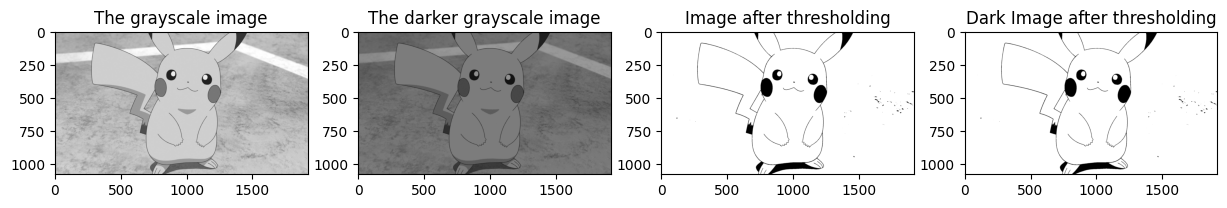

In [ ]:
# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array

plt.figure(figsize=(15,10))

# Convert the color image to gray and show it
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
darkgrayImg= grayImg*0.6 #simulate dark image

plt.subplot(1,4,1)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('The grayscale image')

plt.subplot(1,4,2)
plt.imshow(darkgrayImg, cmap='gray', vmin=0, vmax=1)
plt.title('The darker grayscale image')

# Convert pixel values from [0,1] to [0,255]
grayImgUint = grayImg*255
grayImgUint = grayImgUint.astype(np.uint8) # Images usually require unsigned int8 as data type
darkgrayImgUint = darkgrayImg*255
darkgrayImgUint = darkgrayImgUint.astype(np.uint8) # Images usually require unsigned int8 as data type


# Perform thresholding using Otsu's method
thresh, processedImg = cv2.threshold(grayImgUint, 120, 255, 
                       cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh_dark, darkprocessedImg = cv2.threshold(darkgrayImgUint, 120, 255, 
                       cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('Optimal threshold:', thresh)
print('Optimal threshold dark:', thresh_dark)

# Show the image
plt.subplot(1,4,3)
plt.imshow(processedImg, cmap='gray')
plt.title('Image after thresholding')
plt.subplot(1,4,4)
plt.imshow(darkprocessedImg, cmap='gray')
plt.title('Dark Image after thresholding')


plt.show()

### **Image convolution in general**  

The following code cell compares the speed of convolution implemented with OpenCV and NumPy. We shall see that the former is much faster than the latter, since it invokes efficient C++ bindings and other optimizations.

0.01 seconds taken for cv2.filter2D
40.212 seconds taken for Naive Implementation


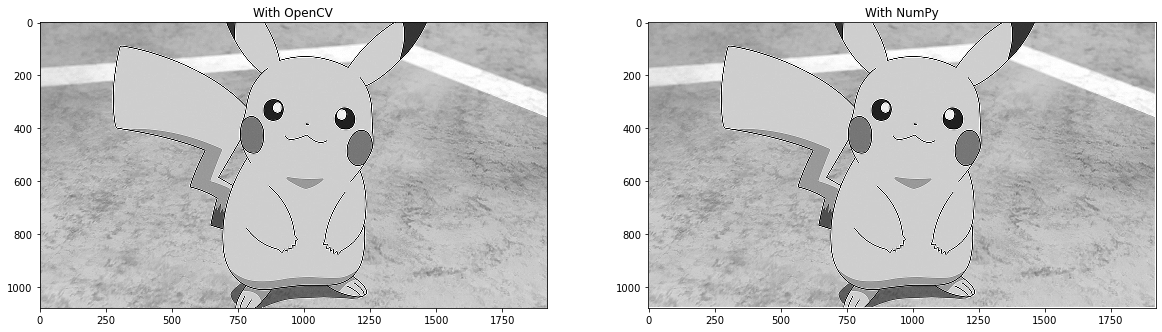

In [ ]:
import time # For timing

def convolution(img, filter, padding='zero'):
    pad = filter.shape[0] // 2
    # Create (height + 2*pad, width+ 2*pad) sized empty array 
    zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2])
    # Fill the center of empty array with given image 
    zero_padded_img[pad:-pad, pad:-pad] = img
    output = np.zeros_like(img)
    for row in range(pad, img.shape[0]+ pad):
        for column in range(pad, img.shape[1] + pad):
            # Crop filter sized patch from zero padded image
            patch = zero_padded_img[row - pad: row - pad + filter.shape[0], column - pad : column - pad + filter.shape[1]]
            output[row - pad, column - pad] = np.sum(patch * filter)
    return output

# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert to grayscale

#### Method 1 : cv2.filter2D
# Define figure
plt.figure(figsize=(20,20))

# Prepare a kernel (a sharpening kernel here)
kernel_3x3 = np.array([ [0,-1,0],
                        [-1,5,-1],
                        [0,-1,0] ])
start = time.time()
for i in range(3): # Perform filtering 5 times
    grayImg = cv2.filter2D(grayImg, -1, kernel_3x3)
    
print(f"{round(time.time()- start, 3)} seconds taken for cv2.filter2D")
plt.subplot(1, 2, 1)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('With OpenCV')

#### Method 2 : Naive Implementation
img = plt.imread('pikachu.png')
grayImg_np = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

start = time.time()
for i in range(3): # Perform filtering 5 times
    grayImg_np = convolution(grayImg_np, kernel_3x3)
print(f"{round(time.time()- start, 3)} seconds taken for Naive Implementation")

plt.subplot(1, 2, 2)
plt.imshow(grayImg_np, cmap='gray', vmin=0, vmax=1)
plt.title('With NumPy')

plt.show()

### **Image convolution with smoothing kernel**

0.018 seconds taken for cv2.filter2D


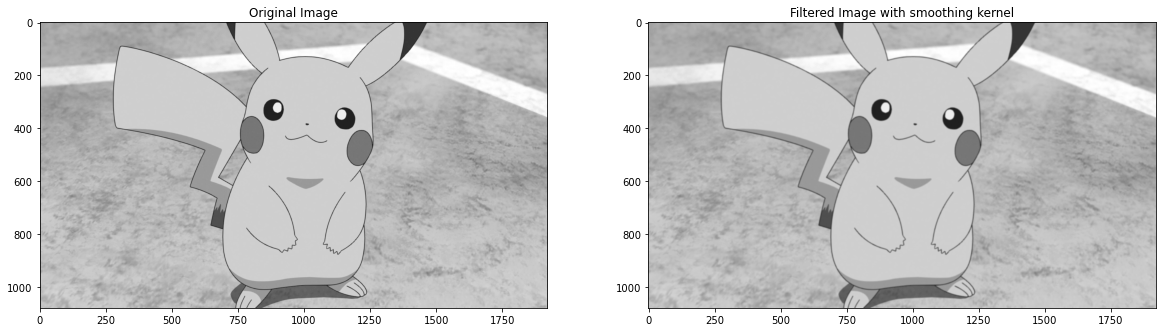

In [ ]:
import time # For timing

def convolution(img, filter, padding='zero'):
  pad = filter.shape[0] // 2
  # Create (height + 2*pad, width+ 2*pad) sized empty array 
  zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2])
  # Fill the center of empty array with given image 
  zero_padded_img[pad:-pad, pad:-pad] = img
  output = np.zeros_like(img)
  for row in range(pad, img.shape[0]+ pad):
    for column in range(pad, img.shape[1] + pad):
      # Crop filter sized patch from zero padded image
      patch = zero_padded_img[row - pad: row - pad + filter.shape[0], column - pad : column - pad + filter.shape[1]]
      output[row - pad, column - pad] = np.sum(patch * filter)
  return output

# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define figure
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image')
# Prepare a kernel (a smoothing kernel here)
kernel_3x3 = np.ones([3,3]) / 9
start = time.time()
for i in range(3): # Perform filtering 5 times
    grayImg = cv2.filter2D(grayImg, -1, kernel_3x3)
    
print(f"{round(time.time()- start, 3)} seconds taken for cv2.filter2D")
plt.subplot(1, 2, 2)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Image with smoothing kernel')

plt.show()

### **Image convolution with sharpening kernel**

0.013 seconds taken for cv2.filter2D


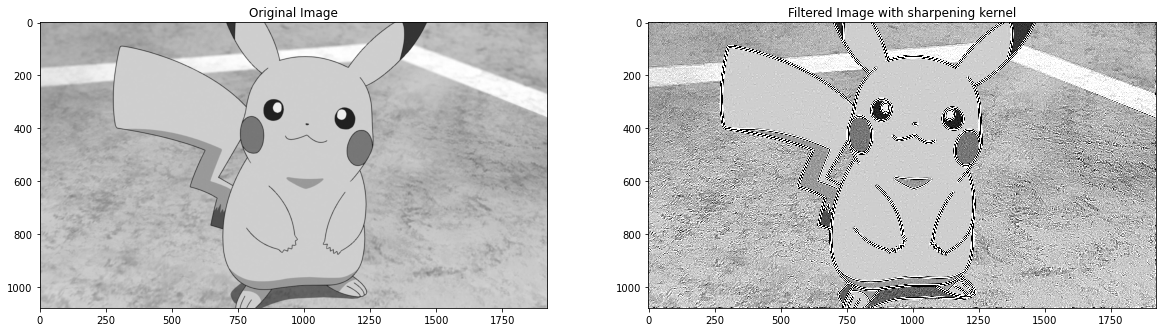

In [ ]:
import time

def convolution(img, filter, padding='zero'):
  pad = filter.shape[0] // 2
  # Create (height + 2*pad, width+ 2*pad) sized empty array 
  zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2])
  # Fill the center of empty array with given image 
  zero_padded_img[pad:-pad, pad:-pad] = img
  output = np.zeros_like(img)
  for row in range(pad, img.shape[0]+ pad):
    for column in range(pad, img.shape[1] + pad):
      # Crop filter sized patch from zero padded image
      patch = zero_padded_img[row - pad: row - pad + filter.shape[0], column - pad : column - pad + filter.shape[1]]
      output[row - pad, column - pad] = np.sum(patch * filter)
  return output

# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define figure
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image')
# Prepare a kernel (a sharpening kernel here)
kernel_3x3 = - np.ones([3,3])
kernel_3x3[1,1] = 9

start = time.time()
for i in range(3): # Perform filtering 5 times
    grayImg = cv2.filter2D(grayImg, -1, kernel_3x3)
    
print(f"{round(time.time()- start, 3)} seconds taken for cv2.filter2D")
plt.subplot(1, 2, 2)
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Image with sharpening kernel')

plt.show()

### **Image convolution with edge kernel**

0.041 seconds taken for cv2.filter2D


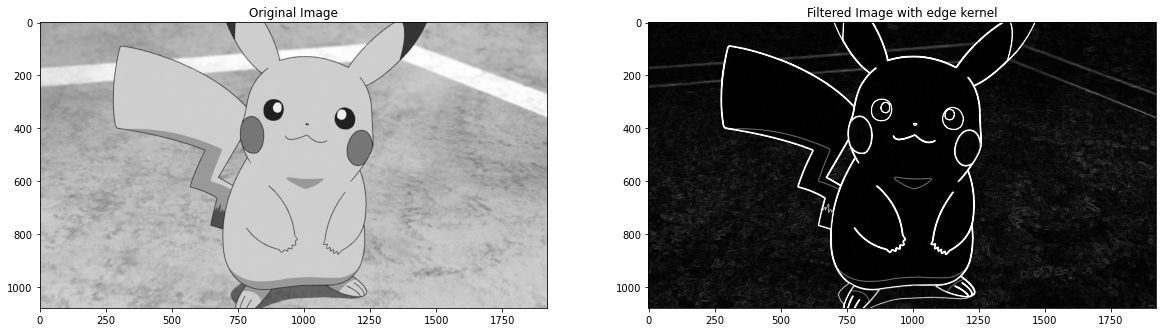

In [ ]:
import time

def convolution(img, filter, padding='zero'):
  pad = filter.shape[0] // 2
  # Create (height + 2*pad, width+ 2*pad) sized empty array 
  zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2])
  # Fill the center of empty array with given image 
  zero_padded_img[pad:-pad, pad:-pad] = img
  output = np.zeros_like(img)
  for row in range(pad, img.shape[0]+ pad):
      for column in range(pad, img.shape[1] + pad):
          # Crop filter sized patch from zero padded image
          patch = zero_padded_img[row - pad: row - pad + filter.shape[0], column - pad : column - pad + filter.shape[1]]
          output[row - pad, column - pad] = np.sum(patch * filter)
  return output

# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,20))

# Implement Sobel Filter with copencv & numpy
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)

kernel_x = np.array([ [-1,0,1],
                      [-2,0,2],
                      [-1,0,1] ])

kernel_y = np.array([ [-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

start = time.time()
# for i in range(3): # Perform filtering 5 times
grayImg_xgrad = cv2.filter2D(grayImg, -1, kernel_x)
grayImg_ygrad = cv2.filter2D(grayImg, -1, kernel_y)

edge_magnitude = (((grayImg_xgrad ** 2) + (grayImg_ygrad ** 2)))**0.5

plt.subplot(1, 2, 2)
plt.imshow(edge_magnitude, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Image with edge kernel')

print(f"{round(time.time()- start, 3)} seconds taken for cv2.filter2D")

plt.show()

### **Non-linear filtering**  

* Median filter


In [ ]:
def add_noise(image):
    '''
    Replace random pixel values with 0s and 1s
      coordinates being replaced as 0 (black) = pepper
      coordinate being replaced as 255 (wnite) = salt
    '''
    row,col = image.shape
    s_vs_p = 0.5                                              # Proportion between salt and pepper cells
    amount = 0.3                                              # Proportion of salt&pepper cells with respect to the whole image
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)          # number of salt cells
    coords = [np.random.randint(0, i - 1, int(num_salt))      # random select coordinates to replace with value 255
            for i in image.shape]
    out[coords] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))  # number of pepper cells
    coords = [np.random.randint(0, i - 1, int(num_pepper))    # random select coordinates to replace with value 0
            for i in image.shape]
    out[coords] = 0
    return out



<ipython-input-22-354003768834>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
<ipython-input-22-354003768834>:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
/Users/hkchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hkchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

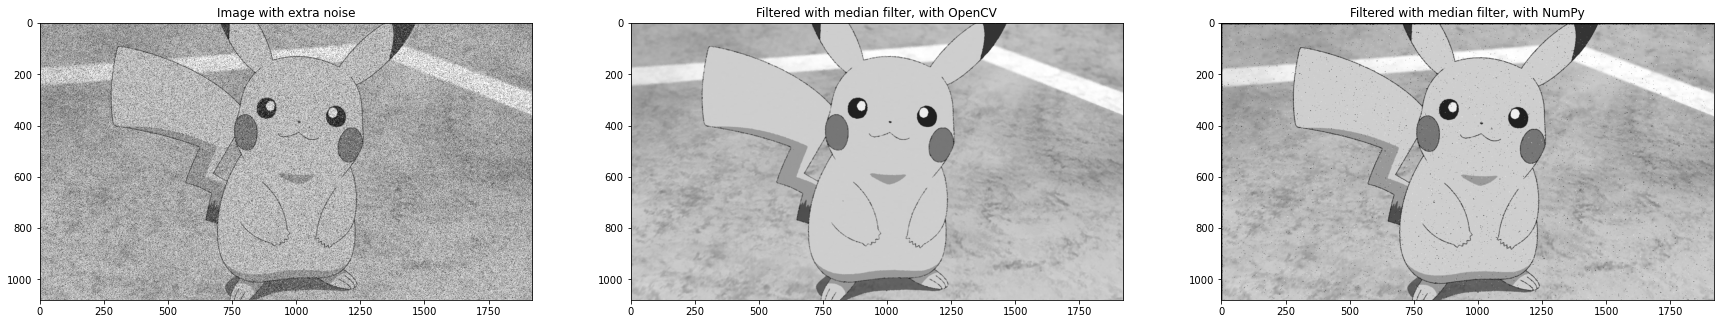

In [ ]:
# Import all the required libraries
import cv2; import numpy as np
import matplotlib.pyplot as plt

def median_filter(img,kernel_size):
  pad = kernel_size//2
  # Create (height + 2*pad, width+ 2*pad) sized empty array 
  output_img = np.copy(img)
  zero_padded_img = np.zeros([img.shape[0] + pad * 2, img.shape[1] + pad * 2])
  # Fill the center of empty array with given image 
  zero_padded_img[pad:-pad, pad:-pad] = img

  output = np.zeros_like(img)
  for row in range(pad, img.shape[0]+pad):
      for column in range(pad, img.shape[1]+pad):
          # crop filter sized patch from zero padded image
          patch = zero_padded_img[row - pad: row - pad + kernel_size, column - pad : column - pad + kernel_size]
          output[row, column] = np.median(patch) #np.sum(patch * filter)
  return output

# Read the image
img = plt.imread('pikachu.png') # Read the image pikachu.png and we get an image that stores as NumPy array
# Convert the color image to gray and show it
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) * 255
grayImgNoise  = add_noise(grayImg)                           # Add noise to image

plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
grayImgUint = grayImgNoise.astype(np.uint8)
plt.imshow(grayImgUint, cmap='gray',vmin=0, vmax=255)       # Plot image with extra noise
plt.title('Image with extra noise')

plt.subplot(1, 3, 2)
# Perform median filtering
resultImg = cv2.medianBlur(grayImgUint, 5)
# Show the resulting images
plt.imshow(resultImg, cmap="gray", vmin=0, vmax=255)        # Plot cv2 filtered image 
plt.title('Filtered with median filter, with OpenCV')

plt.subplot(1, 3, 3)
# Perform median filtering
filtered = median_filter(grayImgUint, 5)
# Show the resulting images
plt.imshow(filtered, cmap='gray',vmin=0, vmax=255)          # Plot numpy filtered image
plt.title('Filtered with median filter, with NumPy')

plt.show()